<div class="alert alert-block alert-success"> 
 Generic Example
</div>

Load the libraries being used in the demo including the dill libray to pickle the data handler once they were loaded.

In [9]:
import dill as pickle
from cosinorage.datahandlers import GenericDataHandler, plot_enmo
from cosinorage.features import WearableFeatures, dashboard
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Binary flag indicating if the data handler should be reloaded from the data files (True) or just loaded from the pickle file (False). When running the demo multiple times, it is recommended to set this to False to avoid reloading the data handler from the data files - however, please note that when running the notebook for the first time, it is important to set this to True to ensure that the data handler is loaded from the data files.

In [10]:
reload = True

Determine the preprocess arguments for the GalaxyDataHandler. The arguments are used for the autocalibration procedure, the frequency filtering and the wear detection algorithm.

In [11]:
preprocess_args = {
    'autocalib_sd_criter': 0.001,
    'autocalib_sphere_crit': 0.08,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
    'required_daily_coverage': 0.25
}

Load the data from patient into the GenericDataHandler object from the data files which are located at the specified file directory.

In [12]:
if reload:
    generic_handler = GenericDataHandler(file_path='../data/public data/processed/watch_acc/0A986513-7828-4D53-AA1F-E02D6DF9561B_watch_acc.csv', 
                                            data_format='csv',
                                            data_type='accelerometer-mg',
                                            time_format='unix-s',
                                            time_column='timestamp',
                                            data_columns=['x', 'y', 'z'],
                                            preprocess_args=preprocess_args,
                                            verbose=True
                                            )

    with open("pickle/generic_handler.pkl", "wb") as file:
        pickle.dump(generic_handler, file)
else:
    with open("pickle/generic_handler.pkl", "rb") as file:
        generic_handler = pickle.load(file)

Read csv file from ../data/public data/processed/watch_acc/0A986513-7828-4D53-AA1F-E02D6DF9561B_watch_acc.csv
Loaded 8460123 Count data records from ../data/public data/processed/watch_acc/0A986513-7828-4D53-AA1F-E02D6DF9561B_watch_acc.csv
Filtered out 1980123/8460123 accelerometer-mg records due to filtering out first and last day
Filtered out 0/6480000 records due to incomplete daily coverage
Filtered out 0/6480000 records due to filtering for longest consecutive sequence of days
Filtered to ensure first day starts at 00:00 and last day ends at 23:59: 0/6480000 records removed
Resampled 6480000 to 4320 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Calculated ENMO for 4320 accelerometer records
Preprocessed accelerometer-mg data
__load_data executed in 10.40 seconds


/Users/jacquesleooscar/Documents/Education/ETHZ/Curriculum/Semester04/04MasterThesis/CosinorAge/venv/lib/python3.9/site-packages/skdh/preprocessing/calibrate.py:163: UserWarning: Less than 72 hours of data (0.047999954399999996 hours). No Calibration performed
  warn(


Printing out the metadata which was collected during data loading.

In [13]:
generic_handler.get_meta_data()

{'datasource': 'Generic',
 'data_format': 'CSV',
 'time_format': 'unix-s',
 'raw_data_type': 'Accelerometer',
 'time_column': 'timestamp',
 'data_columns': ['x', 'y', 'z'],
 'raw_n_datapoints': 8460123,
 'raw_start_datetime': Timestamp('2015-12-08 19:08:37.079999924'),
 'raw_end_datetime': Timestamp('2015-12-12 17:08:41.960000038'),
 'sf': np.float64(25.000023750022564),
 'raw_data_frequency': '25.0Hz',
 'raw_data_unit': 'mg',
 'total_time': 259140.0,
 'wear_time': 20.519980506,
 'non-wear_time': 259119.480019494}

In [14]:
generic_handler.get_ml_data()

,x,y,z,x_raw,y_raw,z_raw,wear,enmo
timestamp,,,,,,,,
2015-12-09 00:00:00,0.090551,0.453912,-0.700737,89.876000,457.097333,-695.054667,0.0,0.000000
2015-12-09 00:01:00,-0.011087,0.406500,-0.733439,251.354667,736.012000,-540.970667,0.0,0.000000
2015-12-09 00:02:00,-0.101840,0.354332,-0.767925,-374.353333,418.108000,-733.341333,0.0,0.000000
2015-12-09 00:03:00,-0.170757,0.301538,-0.801093,-387.512000,437.466667,-775.465333,0.0,0.000000
2015-12-09 00:04:00,-0.212744,0.261053,-0.825821,-106.752000,39.422667,-987.134667,0.0,0.000000
...,...,...,...,...,...,...,...,...
2015-12-11 23:55:00,-0.007588,-0.013045,-1.001024,-8.000000,-11.877708,-1004.122292,0.0,1.137782
2015-12-11 23:56:00,-0.005866,-0.013378,-1.002151,-8.000000,-9.781272,-1006.218728,0.0,2.257806
2015-12-11 23:57:00,-0.003205,-0.014032,-1.003149,-10.206577,-13.736342,-1000.006234,0.0,3.252478


Plotting the preprocessed ENMO data.

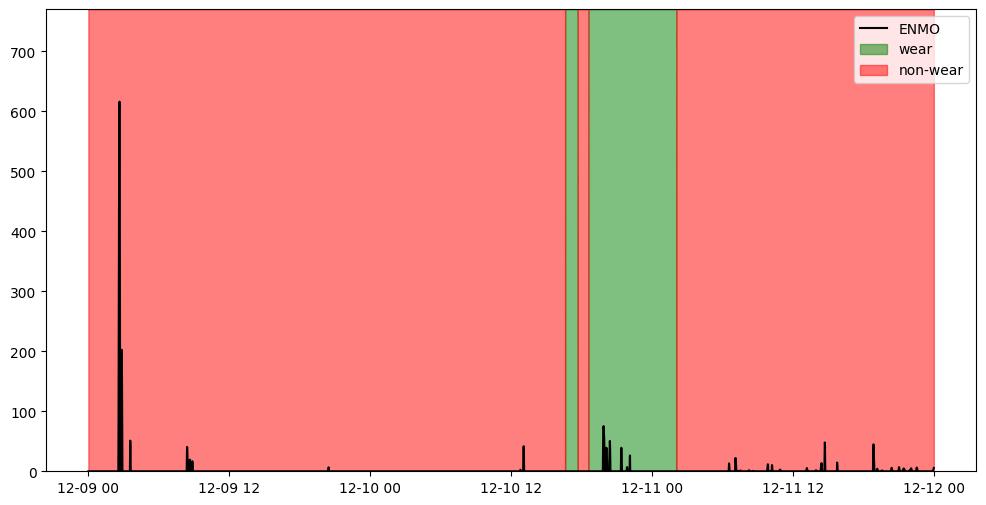

In [15]:
plot_enmo(generic_handler)

Setting hyperparameters for the sleep detection algorithm (sleep_ck_sf, sleep_rescore) and the cutpooint for the physical activity detection algorithm (pa_cutpoint_sl (cutpoint sedentary to light), pa_cutpoint_lm (cutpoint light to moderate), pa_cutpoint_mv (cutpoint moderate to vigorous)). sleep_ck_sf is a scale factor used in the sleep prediction algorithm - it needs to be adjusted depending on the data source and desired sensitivity of sleep detection.

In [16]:
features_args = {
    'sleep_ck_sf': 0.05,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 15,
    'pa_cutpoint_lm': 35,
    'pa_cutpoint_mv': 70,
}

Compute a wide range of variable features and plot them in the dashboard below.

In [17]:
features = WearableFeatures(generic_handler, features_args)

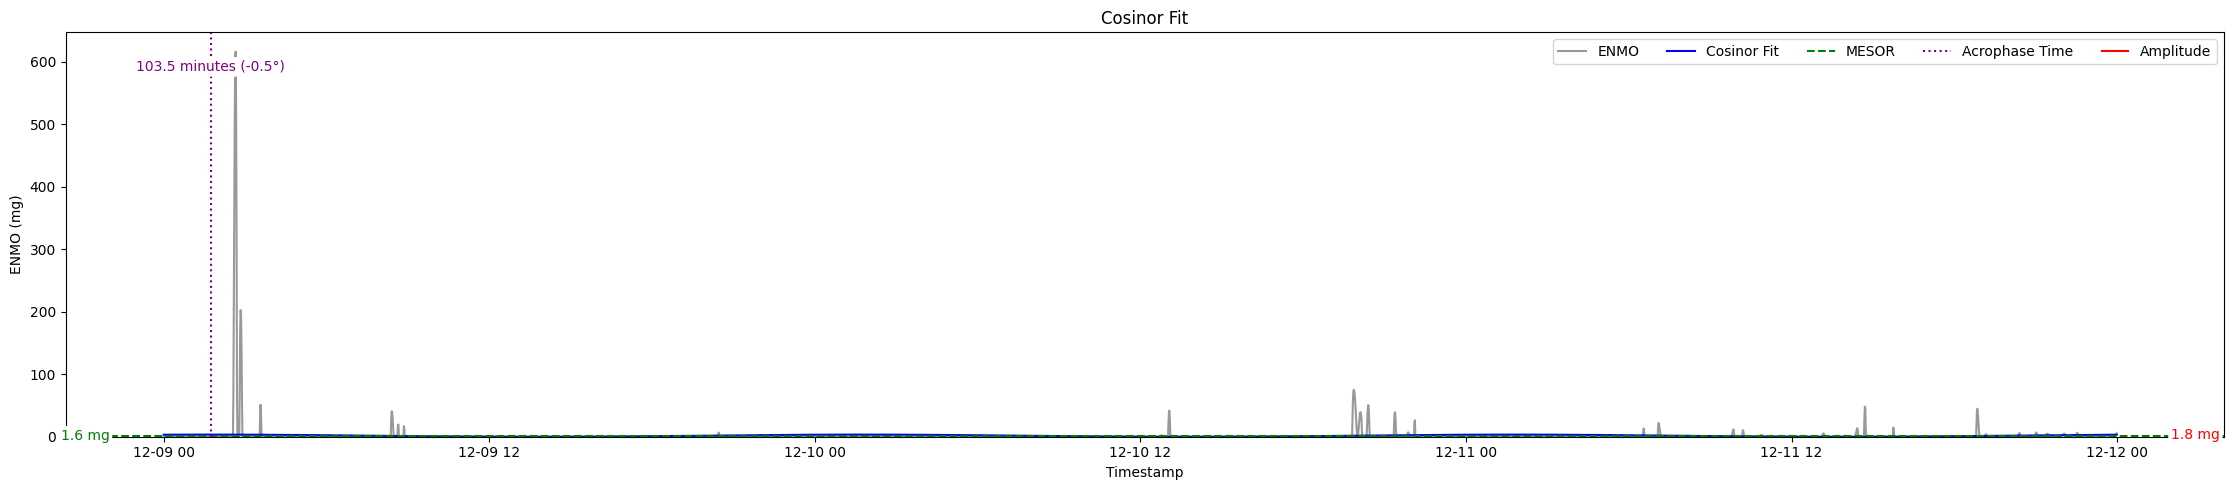

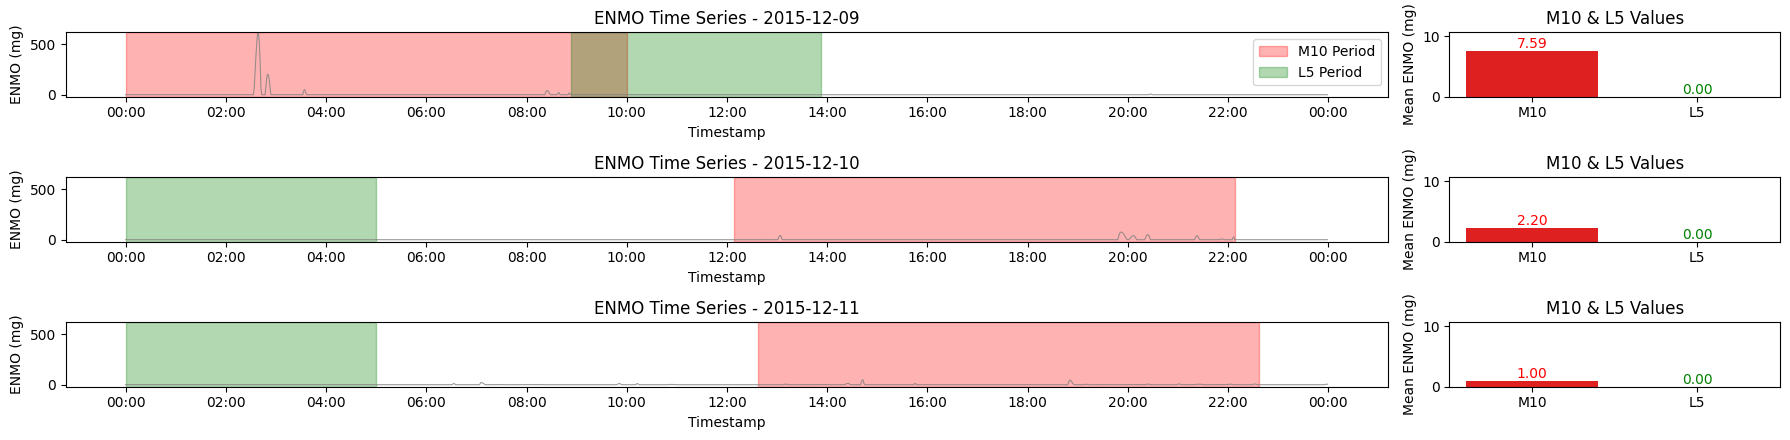

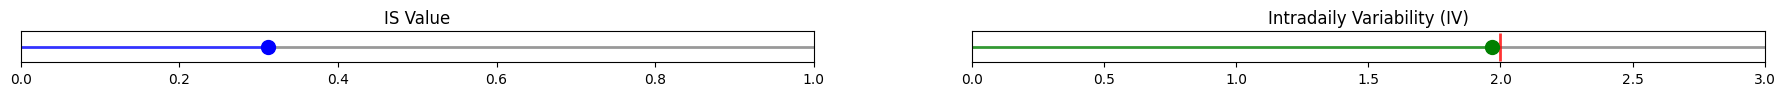

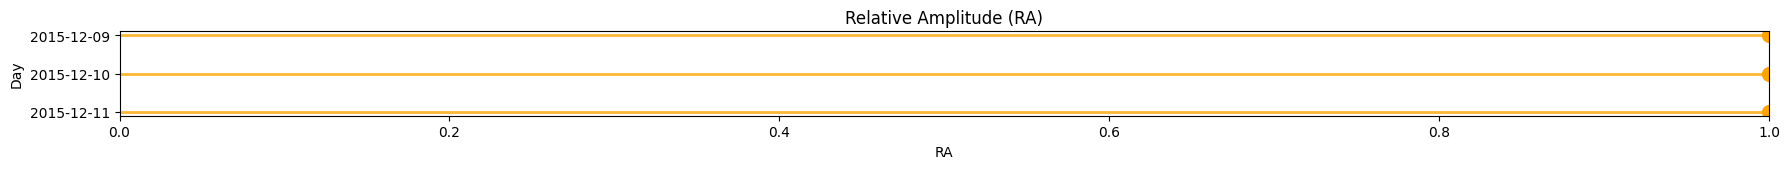

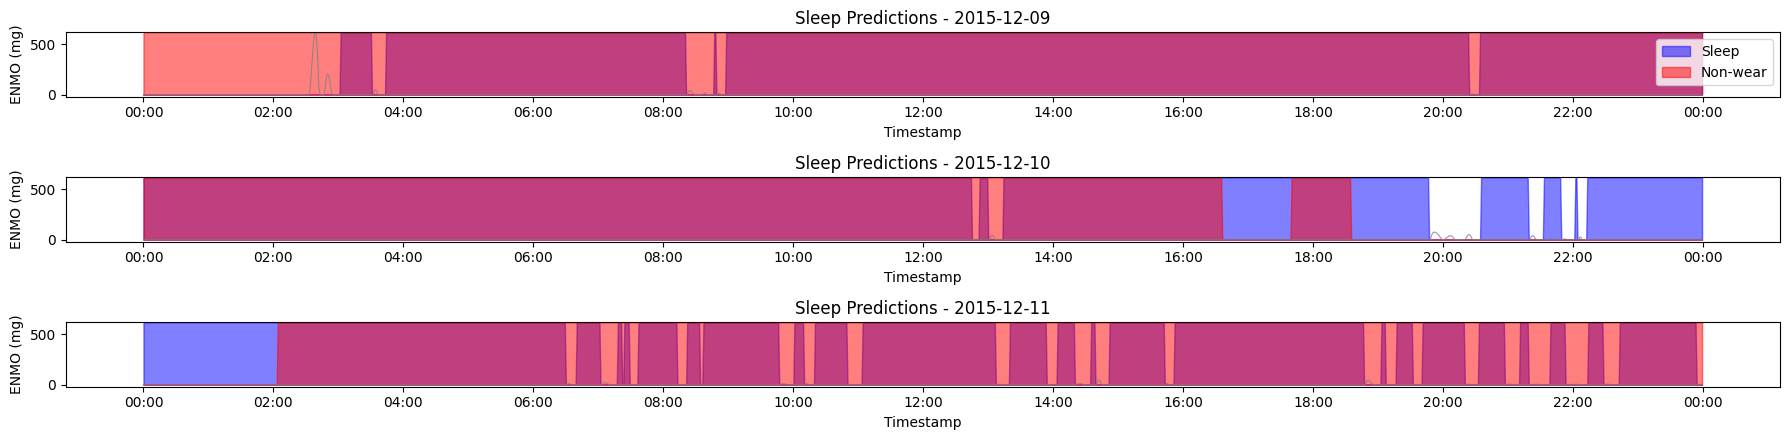

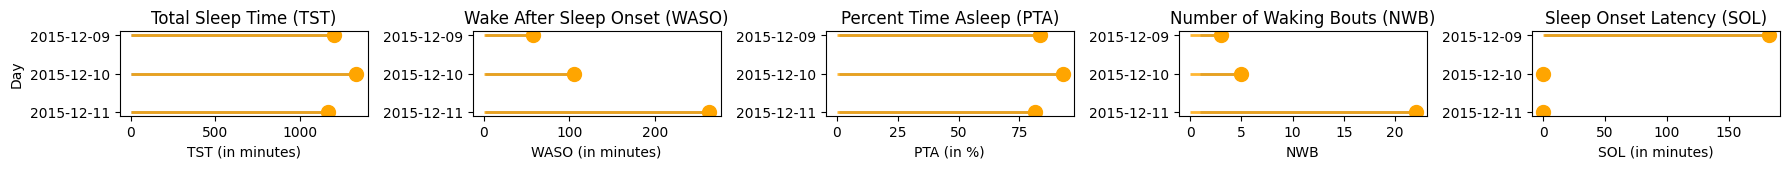

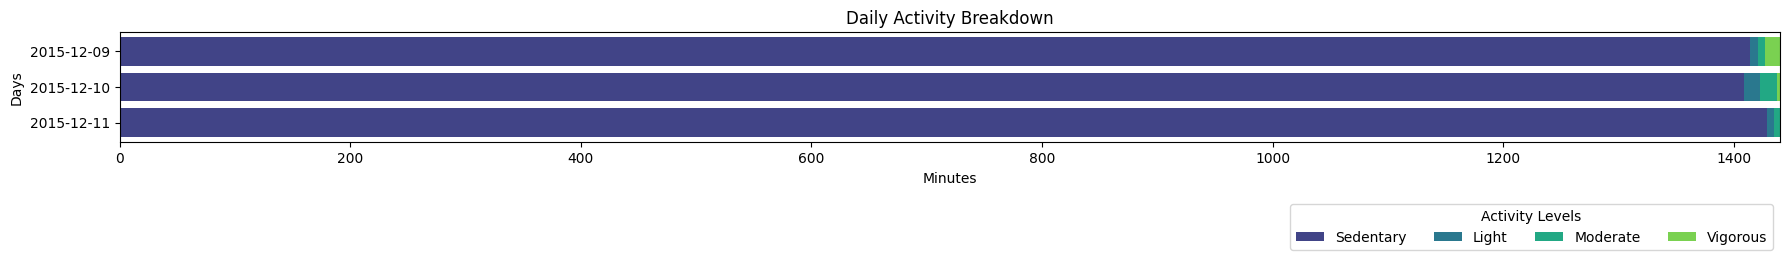

In [18]:
dashboard(features)

In [19]:
features.get_features()

{'cosinor': {'mesor': np.float64(1.5537502164741155),
  'amplitude': np.float64(1.8273701477761577),
  'acrophase': np.float64(-0.4514613831460368),
  'acrophase_time': 103.46732746962608},
 'nonparam': {'IS': 0.31139272684928787,
  'IV': 1.9693571939698142,
  'M10': [7.586781012465034, 2.200435862435154, 0.9966618225220839],
  'M10_start': [Timestamp('2015-12-09 00:00:00'),
   Timestamp('2015-12-10 12:08:00'),
   Timestamp('2015-12-11 12:37:00')],
  'L5': [0.0, 0.0, 0.0],
  'L5_start': [Timestamp('2015-12-09 08:53:00'),
   Timestamp('2015-12-10 00:00:00'),
   Timestamp('2015-12-11 00:00:00')],
  'RA': [1.0, 1.0, 1.0]},
 'physical_activity': {'sedentary': [1414, 1409, 1429],
  'light': [7, 14, 6],
  'moderate': [6, 14, 5],
  'vigorous': [13, 3, 0]},
 'sleep': {'TST': [1200, 1335, 1170],
  'WASO': [58, 105, 264],
  'PTA': [83.333, 92.708, 81.25],
  'NWB': [3, 5, 22],
  'SOL': [182, 0, 0],
  'SRI': 5.814222839935141}}

In [20]:
records = [
    {'handler': generic_handler, 
     'age': 40, 
     'gender': 'unknown', 
     'gt_cosinor_age': 22
    }
]

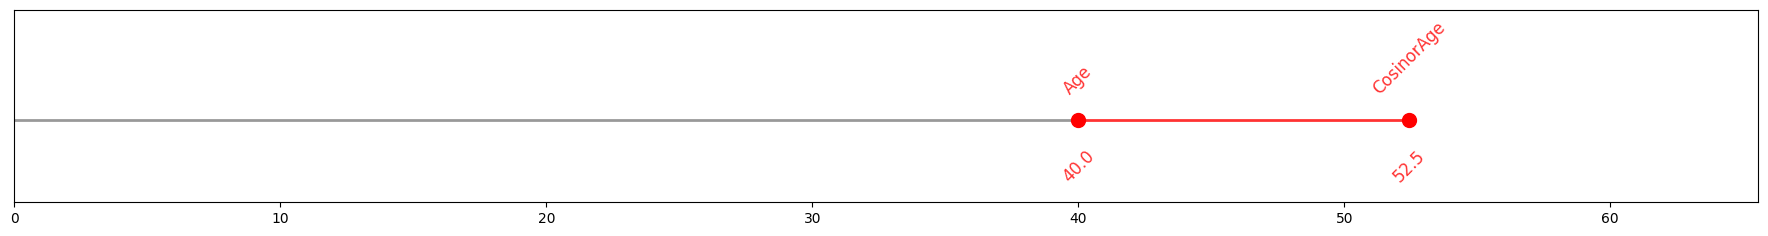

In [21]:
cosinor_age = CosinorAge(records)
cosinor_age.plot_predictions()

In [22]:
cosinor_age.get_predictions()

[{'handler': <cosinorage.datahandlers.genericdatahandler.GenericDataHandler at 0x3300ea100>,
  'age': 40,
  'gender': 'unknown',
  'gt_cosinor_age': 22,
  'mesor': np.float64(1.5537502164741155),
  'amp1': np.float64(1.8273701477761577),
  'phi1': np.float64(-0.4514613831460368),
  'cosinorage': 52.45057481876441,
  'cosinorage_advance': 12.450574818764409}]